<a href="https://colab.research.google.com/github/Aveiro11/To-work/blob/master/Copy_of_Relisource_P3_oversample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import tree

In [2]:
traind=pd.read_csv("train.csv")
testd=pd.read_csv("test.csv")

In [3]:
traind.shape

(6000, 8)

In [4]:
traind[traind['ID'] == 6002]

,ID,col_0,col_1,col_2,col_3,col_4,col_5,y


In [5]:
traind.isnull().sum()

ID       0
col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
y        0
dtype: int64

In [6]:
traind.columns

Index(['ID', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'y'], dtype='object')

In [7]:
traind['y'].unique()

array(['C3', 'C1', 'C2', 'C6', 'C4', 'C5'], dtype=object)

In [8]:
traind.groupby('y').median()

<ipython-input-8-c3846eda04ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traind.groupby('y').median()


,ID,col_1,col_2,col_3,col_4,col_5
y,,,,,,
C1,2998.0,0.521739,310.1,-0.008719,0.418972,1507.0
C2,2408.0,0.565217,310.2,2.378818,0.363636,1386.0
C3,2313.0,0.554348,310.5,-0.249478,0.857708,1530.0
C4,3511.0,0.489130,310.0,1.626443,0.822134,1367.0
C5,2480.0,0.586957,311.0,0.643340,0.375494,1438.0
C6,3370.0,0.782609,310.7,1.185050,0.434783,1349.0


In [9]:
traind.groupby('y').mean()

<ipython-input-9-6d9bf028f570>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traind.groupby('y').mean()


,ID,col_1,col_2,col_3,col_4,col_5
y,,,,,,
C1,3000.389915,0.511928,310.022535,-0.036977,0.421328,1540.600414
C2,2799.157895,0.521548,309.933333,0.777447,0.397753,1791.210526
C3,2562.629630,0.559581,310.329630,-0.217154,0.863124,1557.777778
C4,3407.765957,0.506938,310.046809,1.658672,0.827012,1354.446809
C5,2677.727273,0.587945,310.909091,0.518400,0.374775,1488.363636
C6,3125.059701,0.792505,310.794030,1.261410,0.446168,1340.567164


In [10]:
# labels,counts = pd.factorize(traind['col_0'])
# traind['col_0'] = labels

In [11]:
X=traind.drop(columns=['y','ID'],axis=1)
Y=traind['y']

In [12]:
labels,counts = pd.factorize(X['col_0'])
X['col_0'] = labels

In [13]:
print(Y)

0       C3
1       C1
2       C1
3       C1
4       C1
        ..
5995    C1
5996    C1
5997    C2
5998    C1
5999    C1
Name: y, Length: 6000, dtype: object


In [14]:
scaler=StandardScaler()
scaler.fit(X[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

StandardScaler()

In [15]:
stand_data=scaler.transform(X[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

In [16]:
Y.nunique()

6

In [17]:
print(f"C1: {Y[Y== 'C1'].shape[0]}")
print(f"C2: {Y[Y== 'C2'].shape[0]}")
print(f"C3: {Y[Y== 'C3'].shape[0]}")
print(f"C4: {Y[Y== 'C4'].shape[0]}")
print(f"C5: {Y[Y== 'C5'].shape[0]}")
print(f"C6: {Y[Y== 'C6'].shape[0]}")

C1: 5791
C2: 57
C3: 27
C4: 47
C5: 11
C6: 67


In [18]:
#We see there are too many values categorized for C1, hence the dataset becomes underfit
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X, Y = under.fit_resample(X, Y)


In [19]:
print(f"C1: {Y[Y== 'C1'].shape[0]}")

C1: 11


In [20]:
# Now as the value C1s undersampling has been handled, we will oversample all the other values so that all becomes equal
# and we get a balanced dataset
for i in range(Y.nunique()-1):
  oversample = RandomOverSampler(sampling_strategy='minority')
  X,Y= oversample.fit_resample(X,Y)

In [21]:
print(f"C1: {Y[Y== 'C1'].shape[0]}")
print(f"C2: {Y[Y== 'C2'].shape[0]}")
print(f"C3: {Y[Y== 'C3'].shape[0]}")
print(f"C4: {Y[Y== 'C4'].shape[0]}")
print(f"C5: {Y[Y== 'C5'].shape[0]}")
print(f"C6: {Y[Y== 'C6'].shape[0]}")

C1: 67
C2: 67
C3: 67
C4: 67
C5: 67
C6: 67


In [22]:
X.shape

(402, 6)

In [23]:
X_train=X
Y_train=Y
X_test=pd.read_csv("test.csv")
X_testp=X_test.drop(columns=['ID'],axis=1)
labels,counts = pd.factorize(X_test['col_0'])
X_testp['col_0'] = labels
scaler.fit(X_testp[['col_0','col_1',	'col_2',	'col_3',	'col_4',	'col_5']])

StandardScaler()

In [24]:
classifier=svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [26]:
X_trainp=classifier.predict(X_train)
train_data_acc=accuracy_score(X_trainp,Y_train)

In [27]:
print(train_data_acc)

0.8208955223880597


In [28]:
f1 = f1_score(Y_train, X_trainp, average='weighted')
precision = precision_score(Y_train, X_trainp, average='weighted')
recall = recall_score(Y_train, X_trainp, average='weighted')
# Print the F1 score
print("F1 Score:", f1)
print("Precision :", precision)
print("Recall:", recall)

F1 Score: 0.8138832632528418
Precision : 0.8325278105098844
Recall: 0.8208955223880597


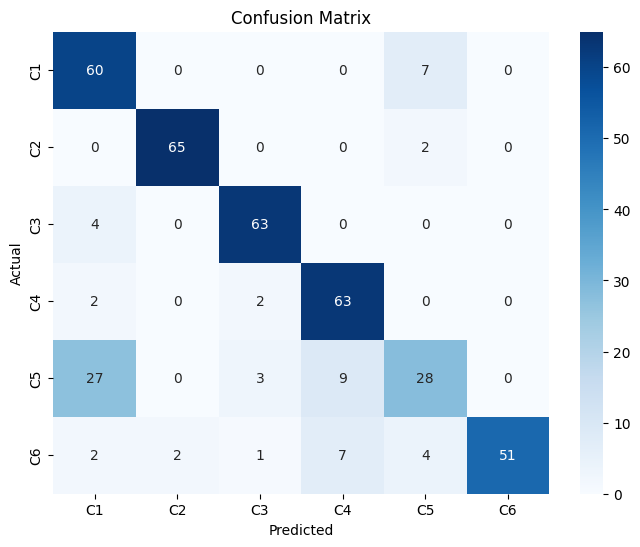

In [29]:
conf_matrix = confusion_matrix(Y_train, X_trainp)


class_labels = np.unique(np.concatenate((Y_train, X_trainp)))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
X_testp2=classifier.predict(X_testp)


#KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
X_trainp=knn.predict(X_train)
train_data_acc=accuracy_score(X_trainp,Y_train)

In [33]:
print(train_data_acc)

0.8830845771144279


In [34]:
f1 = f1_score(Y_train, X_trainp, average='weighted')
precision = precision_score(Y_train, X_trainp, average='weighted')
recall = recall_score(Y_train, X_trainp, average='weighted')
# Print the F1 score
print("F1 Score:", f1)
print("Precision :", precision)
print("Recall:", recall)

F1 Score: 0.8806603804261163
Precision : 0.8804523731943087
Recall: 0.8830845771144279


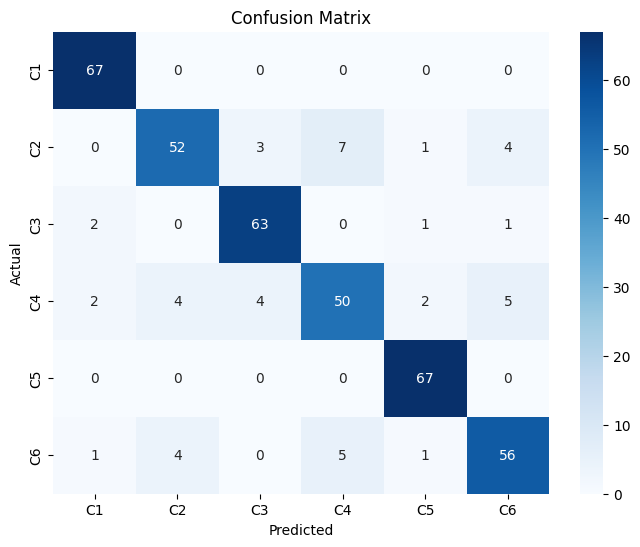

In [35]:
conf_matrix = confusion_matrix(Y_train, X_trainp)


class_labels = np.unique(np.concatenate((Y_train, X_trainp)))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# DT

In [36]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [37]:
X_trainp=knn.predict(X_train)
train_data_acc=accuracy_score(X_trainp,Y_train)
print(train_data_acc)

0.8830845771144279


In [38]:
f1 = f1_score(Y_train, X_trainp, average='weighted')
precision = precision_score(Y_train, X_trainp, average='weighted')
recall = recall_score(Y_train, X_trainp, average='weighted')
# Print the F1 score
print("F1 Score:", f1)
print("Precision :", precision)
print("Recall:", recall)

F1 Score: 0.8806603804261163
Precision : 0.8804523731943087
Recall: 0.8830845771144279


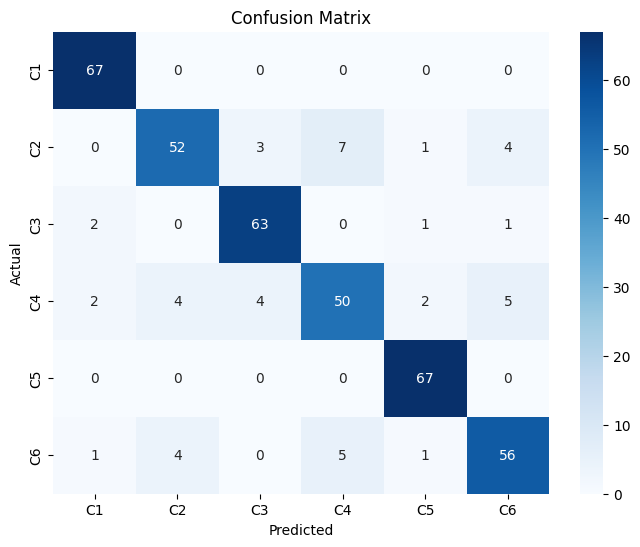

In [39]:
conf_matrix = confusion_matrix(Y_train, X_trainp)


class_labels = np.unique(np.concatenate((Y_train, X_trainp)))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# LoR

In [40]:
clf2 = LogisticRegression()
clf2.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
X_trainp=knn.predict(X_train)
train_data_acc=accuracy_score(X_trainp,Y_train)
print(train_data_acc)

0.8830845771144279


In [42]:
f1 = f1_score(Y_train, X_trainp, average='weighted')
precision = precision_score(Y_train, X_trainp, average='weighted')
recall = recall_score(Y_train, X_trainp, average='weighted')
# Print the F1 score
print("F1 Score:", f1)
print("Precision :", precision)
print("Recall:", recall)

F1 Score: 0.8806603804261163
Precision : 0.8804523731943087
Recall: 0.8830845771144279


In [43]:
# X_test['y'] = X_testp2

In [44]:
# X_test[['ID', 'y']]